# Python for bioimage analysis

In [1]:
# /// script
# requires-python = ">=3.12"
# dependencies = [
#     "bioio",
#     "bioio-nd2",
#     "bioio-tifffile",
#     "imageio",
#     "matplotlib",
#     "ndv[jupyter,vispy]",
#     "numpy",
#     "rich",
# ]
# ///

format later:
# Description

In this Notebook...
# Objectives

    ...
    ...

# Table of Contentss
1. Importing libraries
2. Reading images
3. View images using ndv
4. Images as numpy arrays
5. Visualize images using Matplotlib (functions) 

# 1. Import all necessary libraries

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import ndv
from bioio import BioImage
import bioio_tifffile
from rich import print

# 2. Read images 

There are many ways of reading image files. 
[bioio](https://github.com/bioio-devs/bioio)
can read images of different file-formats.  
Different fileformats require different [plugins](https://github.com/bioio-devs/bioio) 


We use [bioio-tifffile](https://github.com/bioio-devs/bioio-tifffile) to read tiff files.  

We have already installed it to this jupyter notebook by using 

`juv add python_for_bioimage_analysis.ipynb bioio-tifffile`

You can find it at the top of the notebook.  

## Example: Read a tif file using bioio
bioio documentation: https://bioio-devs.github.io/bioio/OVERVIEW.html
Reminder: we imported the relevant packages using 

```python
from bioio import BioImage
import bioio_tifffile
```


bioio loads the image and metadata into a container. We name the container img

In [380]:
img = BioImage("/Users/mariatheiss/Documents/Teaching/bobiac/confocal-series.tif")

In [381]:
type(img)

bioio.bio_image.BioImage

## Task: try out operations on img
Below are a few examples of operations on img. taken from [here](https://github.com/bioio-devs/bioio).  
Try out a few of the operations  

```python 
## Operations 

# Get a BioImage object
img = BioImage("my_file.tiff")  # selects the first scene found
img.data  # returns 5D TCZYX numpy array
img.xarray_data  # returns 5D TCZYX xarray data array backed by numpy
img.dims  # returns a Dimensions object
img.dims.order  # returns string "TCZYX"
img.dims.X  # returns size of X dimension
img.shape  # returns tuple of dimension sizes in TCZYX order
img.get_image_data("CZYX", T=0)  # returns 4D CZYX numpy array

```

## Solution

In [5]:
img.dims.order

'TCZYX'

In [6]:
img.dims

<Dimensions [T: 1, C: 2, Z: 25, Y: 400, X: 400]>

In [7]:
img.shape

(1, 2, 25, 400, 400)

## Extract a numpy array from the Bioimage object

[numpy documentation](https://numpy.org/doc/stable/)

Reminder: we imported numpy as follows: 
```python
import numpy as np
```

In [382]:
# the image is contained in img.data
stack = img.data

In [383]:
type(stack) # verify it's a numpy array

numpy.ndarray

In [10]:
stack.dtype

dtype('uint8')

## Inspect dimensions of stack

In [11]:
print(img.dims) # Reminder: 
print(stack.shape) # only one time-point. This is like a movie with only one frame! 

<Dimensions [T: 1, C: 2, Z: 25, Y: 400, X: 400]>

(1, 2, 25, 400, 400)

## Get rid of axes of length one

Let's generate dummy arrays to understand what the axis of size 1 does 

In [12]:
simple_list = [1, 2, 3]
simple_array = np.array(simple_list) # Turn the list into a numpy array
#simple_array = np.array([0, 1, 2]) #This is equivalent

print(type(simple_array))

<class 'numpy.ndarray'>

In [13]:
print(simple_array)
print(simple_array.shape)

[1 2 3]

(3,)

In [14]:
nested_list = [[1, 2, 3]] # There's extra brackets! 
nested_array = np.array(nested_list) 
print(nested_array)
print(nested_array.shape)

[[1 2 3]]

(1, 3)

.squeeze() gets rid of all dimensions of size 1

In [15]:
print(nested_array.squeeze())
print(nested_array.squeeze().shape)

[1 2 3]

(3,)

## Task: apply this to `stack` and print its shape
## Solution: 

In [16]:
stack = stack.squeeze()

In [17]:
stack.shape

(2, 25, 400, 400)

# 3. View images using ndv
ndv documentation: https://pyapp-kit.github.io/ndv/latest/  
Reminder: we imported ndv using 
```python
import ndv
```



In [18]:
ndv.imshow(stack)

RFBOutputContext()

<IPython.core.display.Javascript object>

# 4. Images as numpy arrays 

In [19]:
# TODO: Explain here how to open an image first 

## 4.1. Loading or generating images 

In [20]:
cat_img = BioImage("/Users/mariatheiss/Documents/Teaching/bobiac/cateye_nonsquare_ds.tif")

In [103]:
cat_img.dims

<Dimensions [T: 1, C: 1, Z: 1, Y: 12, X: 11]>

In [22]:
cat = cat_img.data

In [23]:
cat.shape

(1, 1, 1, 12, 11)

In [24]:
cat = cat.squeeze()

#### 4.2. Inspecting the images

In [25]:
cat

array([[217, 176, 226, 253, 150, 226, 228, 220, 210, 218, 224],
       [215, 181, 236, 219, 225, 220, 215, 210, 141, 173, 105],
       [199, 140, 231, 222, 228, 238, 218, 194, 195, 197,  34],
       [206, 202, 236, 240, 213, 218, 192, 249, 244, 240,  52],
       [226, 220, 235, 202, 188,  50, 226, 242, 233, 224,  49],
       [238, 247, 208, 179, 234,  91, 181, 227, 237, 140,  45],
       [230, 164, 234, 176, 182, 233, 237, 209, 176,  51, 192],
       [246,  86, 204, 218, 199, 202, 230, 208,  51,  61, 222],
       [251,  34, 150, 201, 198, 223, 157,  57,  56, 239, 101],
       [249, 131, 111,  62,  48,  53,  67, 110, 223, 129, 140],
       [253, 148, 169, 184, 150, 182, 197, 236, 206, 142, 197],
       [253, 175, 202, 222, 253, 251, 234, 185, 165, 144, 164]],
      dtype=uint8)

In [26]:
print(cat) # or using the print function. 

[[217 176 226 253 150 226 228 220 210 218 224]
 [215 181 236 219 225 220 215 210 141 173 105]
 [199 140 231 222 228 238 218 194 195 197  34]
 [206 202 236 240 213 218 192 249 244 240  52]
 [226 220 235 202 188  50 226 242 233 224  49]
 [238 247 208 179 234  91 181 227 237 140  45]
 [230 164 234 176 182 233 237 209 176  51 192]
 [246  86 204 218 199 202 230 208  51  61 222]
 [251  34 150 201 198 223 157  57  56 239 101]
 [249 131 111  62  48  53  67 110 223 129 140]
 [253 148 169 184 150 182 197 236 206 142 197]
 [253 175 202 222 253 251 234 185 165 144 164]]

Let's print a few properties of image

In [27]:
print(f'Type of the image: {type(cat)}') 
print(f'Datatype of the image: {cat.dtype}') 
print(f'Shape of the image: {cat.shape}')  # Dimensions of the image
print(f'Minimum pixel value: {cat.min()}')  # Min pixel value
print(f'Maximum pixel value: {cat.max()}')  # Max pixel value
print(f'Mean pixel value: {cat.mean():.2f}')  # Average pixel value

Type of the image: <class 'numpy.ndarray'>

Datatype of the image: uint8

Shape of the image: (12, 11)

Minimum pixel value: 34

Maximum pixel value: 253

Mean pixel value: 184.17

### Generate a simple plot of the image

In [28]:
# TODO: first without a function, than explain function 
def simpleplot(image): # example of function 
    plt.imshow(image, cmap = "gray")# vmax=4)
    plt.colorbar()
    plt.show()

In [327]:
def valueplot(image, indices = [None, None]):
    plt.imshow(image, cmap="gray", vmin=np.min(image), vmax=np.max(image))

    # Annotate each pixel with its value
    for i in range(image.shape[0]):         # row
        for j in range(image.shape[1]):     # column
            plt.text(j, i, str(image[i, j]),
                     ha='center', va='center',
                     color='magenta', fontsize=10)


    plt.ylabel("row; y; axis = 0")
    plt.xlabel("column; x; axis = 1")

    y, x = indices  # row = y, col = x
    if (isinstance(indices, (list, tuple)) and
        len(indices) == 2 and
        all(isinstance(idx, int) for idx in indices)):
        
        assert y < image.shape[0], f"value y {y} out of range"
        assert x < image.shape[1], f"value x {x} out of range"
        
        sign_y = np.sign(y) if y != 0 else 1
        sign_x = np.sign(x) if x != 0 else 1
        y = y % (image.shape[0] - 1)
        x = x % (image.shape[1] - 1)
        rect = Rectangle((x - sign_x * 0.5, y - sign_y * 0.5), 1, 1,
                         linewidth=2, edgecolor='cyan', facecolor='none')
        plt.gca().add_patch(rect)

    plt.yticks([i for i in range(image.shape[0])])
    plt.xticks([i for i in range(image.shape[1])])
    plt.tight_layout()
    plt.show()

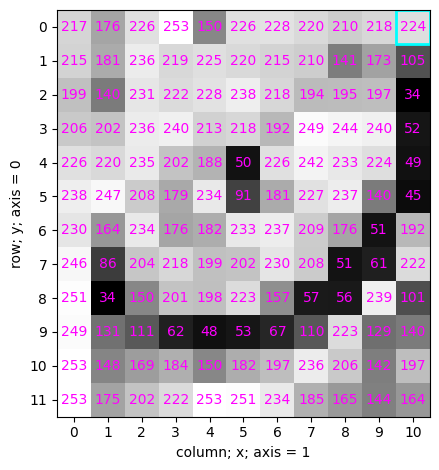

In [462]:
valueplot(cat, [0, -1])

In [261]:
print(cat.flatten()) # explain .flatten(). Explain graphically! 

[217 176 226 253 150 226 228 220 210 218 224 215 181 236 219 225 220 215
 210 141 173 105 199 140 231 222 228 238 218 194 195 197  34 206 202 236
 240 213 218 192 249 244 240  52 226 220 235 202 188  50 226 242 233 224
  49 238 247 208 179 234  91 181 227 237 140  45 230 164 234 176 182 233
 237 209 176  51 192 246  86 204 218 199 202 230 208  51  61 222 251  34
 150 201 198 223 157  57  56 239 101 249 131 111  62  48  53  67 110 223
 129 140 253 148 169 184 150 182 197 236 206 142 197 253 175 202 222 253
 251 234 185 165 144 164]

### Simple histogram

Text(0, 0.5, 'count')

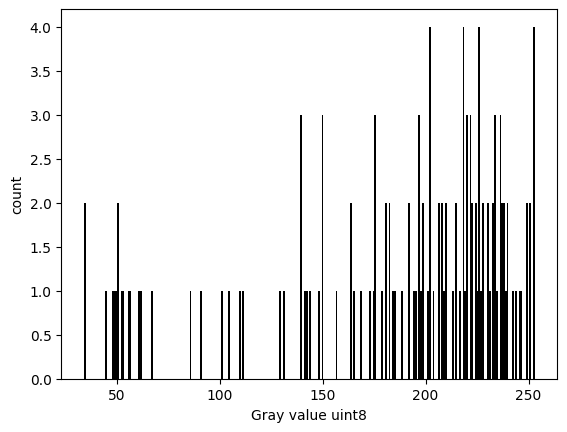

In [262]:
plt.hist(cat.flatten(), bins = 256, color = "k") 
plt.xlabel(f"Gray value {cat.dtype}") # format string
plt.ylabel("count")

### Indexing: individual entries

You can simply write 

In [277]:
print(cat[0, 10])

224

Or pass variables instead of numbers if the same numbers are to be reused: 

224

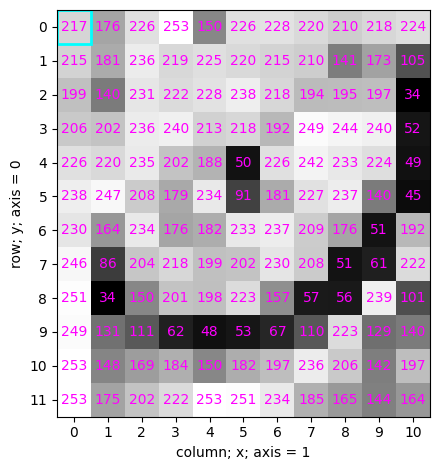

In [276]:
row, col = 0, 10

print(cat[row, col])
valueplot(cat, indices = [row, col])

### Indexing: rows

In [281]:
row = -1
print(cat[row]) # If only one number is supplied, it applies to axis 0
print(cat[row, :]) # This is equivalent

[253 175 202 222 253 251 234 185 165 144 164]

[253 175 202 222 253 251 234 185 165 144 164]

### Indexing: columns

In [280]:
print(cat[:, 0])

[217 215 199 206 226 238 230 246 251 249 253 253]

### Task 

### Solution

In [266]:
# Show them how to query images. Eva introduced that using lists 
# Go slower here! 
# draw a representation
print(cat[4:6, 5])

[50 91]

### Task: Make a copy of cat, and name it lazercat (new variable). Assign a value of 255 to the indicated pixels

### Pitfall

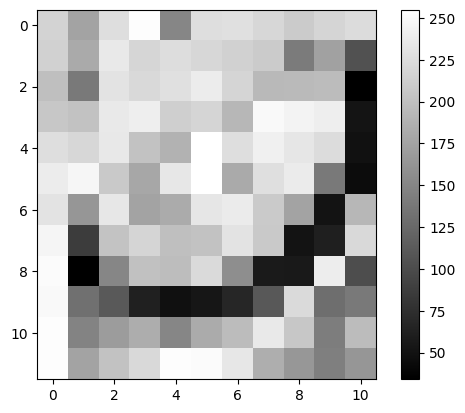

In [267]:
lazercat = cat
lazercat[4:6, 5] = 255
simpleplot(cat)

### Task: Inspect the pixelvalues cat and lazercat

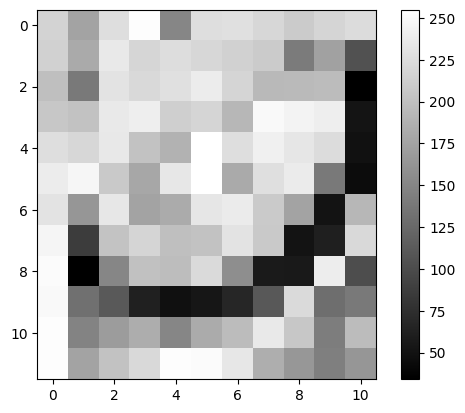

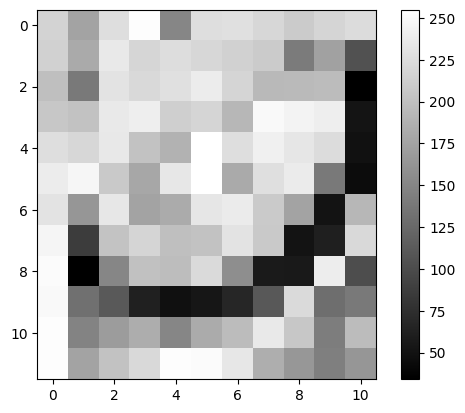

In [268]:
simpleplot(cat)
simpleplot(lazercat)

### Solution

In [269]:
 # reload cat in case it was overwritten
cat_img = BioImage("/Users/mariatheiss/Documents/Teaching/bobiac/cateye_nonsquare_ds.tif")
cat = cat_img.data
cat = cat.squeeze() 

In [270]:
lazercat = np.array(cat)
lazercat[4:6, 5] = 255

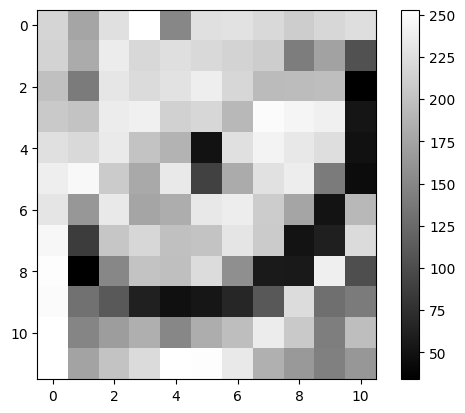

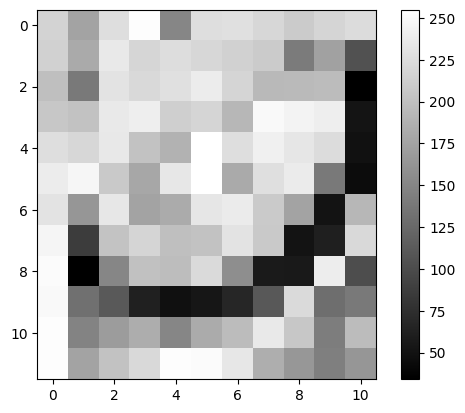

In [271]:
simpleplot(cat)
simpleplot(lazercat)

### Task: Make a copy of cat and name it "pirate". Assign to all pixels but the rim-pixels a value of 0. Plot to verify

### Solution

In [272]:
pirate = np.array(cat)

In [74]:
pirate[1:-1, 1:-1] = 0

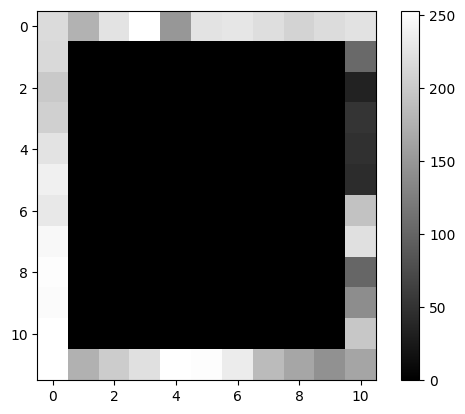

In [75]:
simpleplot(pirate)

### Task: Make a copy of cat and name it "monocle". Assign a value of 0 to the rim pixels. Plot to verify
Tip: you don't need a for-loop for this 

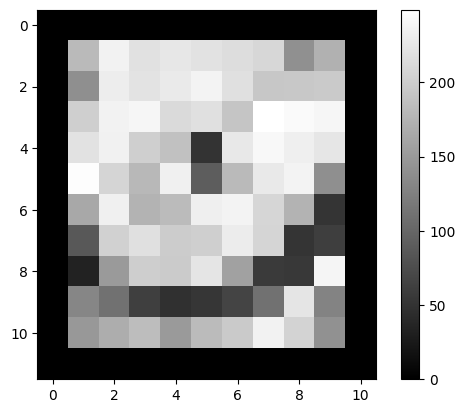

In [79]:
monocle = np.array(cat)
pxvalue = 0
monocle[0, :] = pxvalue
monocle[-1, :] = pxvalue
monocle[:, 0] = pxvalue
monocle[:, -1] = pxvalue

simpleplot(monocle)

### Task: Make a copy of cat and name it "h_tabby". Assign a value of 0 to every other pixel in y to give it a horizontal stripy pattern 

In [88]:
h_tabby = np.array(cat)
ymax = len(cat[0]) # the maximum y value 
for i in range(0, ymax, 2):
    ... # fill in the gap 

### Solution

In [339]:
h_tabby = np.array(cat)
ymax = cat.shape[0]
for i in range(0, ymax, 2):
    h_tabby[i] = 0

In [344]:
h_tabby[0:ymax : 2] = 0
h_tabby[ : : 2] = 0 # This is equivalent

In [345]:
print(cat[ : :2])

[[217 176 226 253 150 226 228 220 210 218 224]
 [199 140 231 222 228 238 218 194 195 197  34]
 [226 220 235 202 188  50 226 242 233 224  49]
 [230 164 234 176 182 233 237 209 176  51 192]
 [251  34 150 201 198 223 157  57  56 239 101]
 [253 148 169 184 150 182 197 236 206 142 197]]

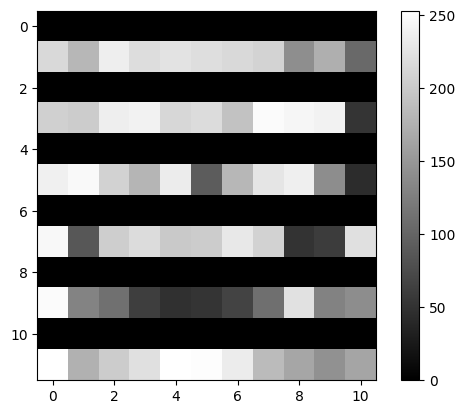

In [346]:
simpleplot(h_tabby)

### Task: Make a copy of cat and name it "v_tabby". Assign a value of 0 to every other pixel in y to give it a vertical stripy pattern 

# Solution

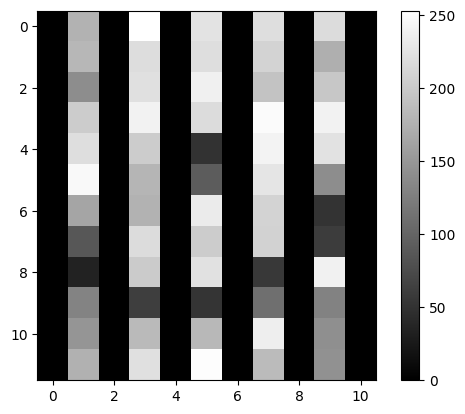

In [314]:
v_tabby = np.array(cat)
v_tabby[:, : : 2] = 0
simpleplot(v_tabby)

### Bonus task: generate an image "checkerboard" that has a checkerboard pattern. 
Tips: 
* there are multiple solutions
* you can use image or vstripes as a template 
* % is the modulo operator. The modulo operator yields the remainder from the division of the first argument by the second. Example: 5%3 = 2
* ^ is an exclusive or. 

### Solution 1

In [347]:
v_tabby = np.array(cat)
v_tabby[:, : : 2] = 0
checkertabby = tabby ^ h_tabby

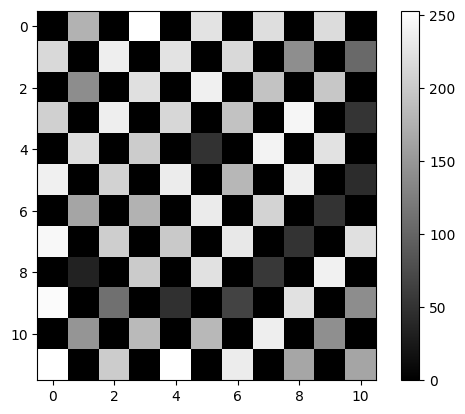

In [348]:
simpleplot(checkertabby)

In [350]:
checkertabby

array([[  0, 176,   0, 253,   0, 226,   0, 220,   0, 218,   0],
       [215,   0, 236,   0, 225,   0, 215,   0, 141,   0, 105],
       [  0, 140,   0, 222,   0, 238,   0, 194,   0, 197,   0],
       [206,   0, 236,   0, 213,   0, 192,   0, 244,   0,  52],
       [  0, 220,   0, 202,   0,  50,   0, 242,   0, 224,   0],
       [238,   0, 208,   0, 234,   0, 181,   0, 237,   0,  45],
       [  0, 164,   0, 176,   0, 233,   0, 209,   0,  51,   0],
       [246,   0, 204,   0, 199,   0, 230,   0,  51,   0, 222],
       [  0,  34,   0, 201,   0, 223,   0,  57,   0, 239,   0],
       [249,   0, 111,   0,  48,   0,  67,   0, 223,   0, 140],
       [  0, 148,   0, 184,   0, 182,   0, 236,   0, 142,   0],
       [253,   0, 202,   0, 253,   0, 234,   0, 165,   0, 164]],
      dtype=uint8)

### Solution 2

In [ ]:
checkerboard2 = np.array(image)

In [ ]:
for i in range(0, 5):
    for j in range(0, 5):
        checkerboard2[i, j] = 255 * ((i + j % 2) % 2)

In [ ]:
simpleplot(checkerboard2)


## 2.2. Numpy and multichannel/z-stacks
A

Use real image! 
Learning goal: 
* handling image axes
* avoiding int overflow, why it's a good idea to use numpy 

#### Reminder: we ran these lines to extract image stack

In [392]:
img = BioImage("/Users/mariatheiss/Documents/Teaching/bobiac/confocal-series.tif")
stack = img.data
stack = stack.squeeze()

In [415]:
print(img.dims)
print(stack.shape)

<Dimensions [T: 1, C: 2, Z: 25, Y: 400, X: 400]>

(2, 25, 400, 400)

### Task: Save the first channel of stack as ch0, and the second as ch1

In [434]:
ch0 =  np.array(stack[0])
ch1 = np.array(stack[1])

In [435]:
ch0 =  np.array(stack[0])
print(ch0.shape)

(25, 400, 400)

### Task: plot ch0 using function simpleplot()

### Pitfalls: 

TypeError: Invalid shape (25, 400, 400) for image data

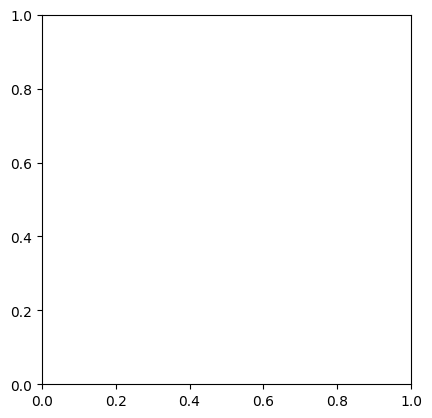

In [436]:
simpleplot(ch0)

### Solution: 
simpleplot can only plot a 2D array. 
You must index ch0 such that it returns a 2D array. Examples: 

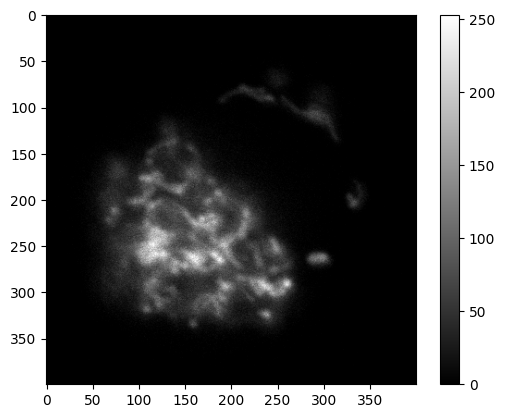

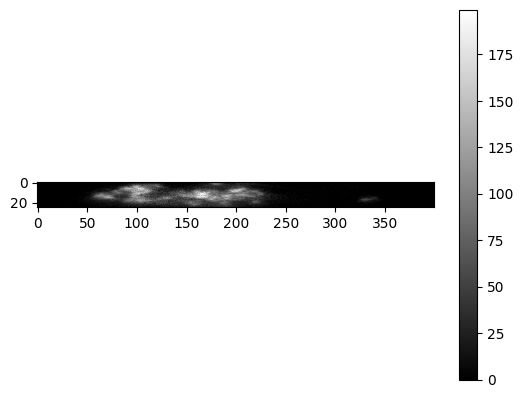

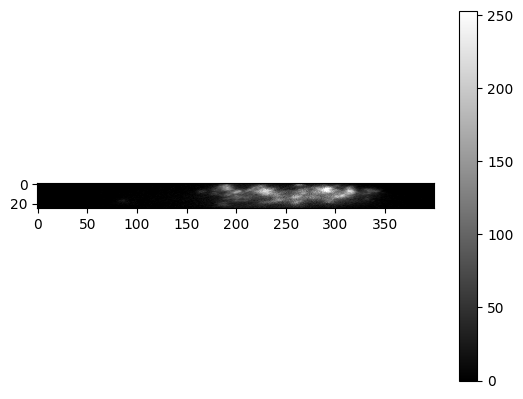

In [437]:
z = 17
y = 200
x = 200
simpleplot(ch0[z]) # show only one z-plane
simpleplot(ch0[ : , y]) # show only one y-plane 
simpleplot(ch0[ : , : , x]) # show only one x-plane

### Task: generate an image that is the mean of all z-planes of ch0. Call it mean_project_ch0
collapse image "stack" into a single-channel image by averaging the values in each channel at every pixel. The result should be a (400, 400) array where each value represents the mean of the two original channels at that position. This is called the mean projection

Tip: https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy-mean

In [453]:
mean_project_ch0 = np.mean( ... ) # fill in the gaps

# test your result
assert mean_project_ch0.shape == (400, 400), f"Your output shape is {mean_project_ch0.shape}, but should be (400, 400)" 
print(mean_project_ch0.shape)
simpleplot(mean_project_ch0)

TypeError: unsupported operand type(s) for /: 'ellipsis' and 'int'

### Solution

(400, 400)

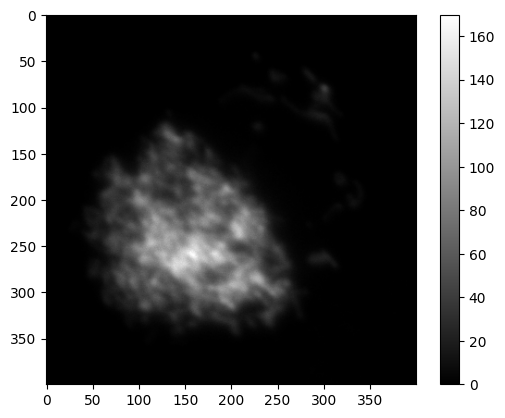

In [441]:
mean_project_ch0 = np.mean(ch0, axis = 0)

# test your result
print(mean_project_ch0.shape)
simpleplot(mean_project_ch0)

In [ ]:
mean_of_chanels

### Task: sanity-check whether np.mean does what you expect it to do without using numpy 

### Bonus: Pitfall

In [ ]:
channel1 = multichannel[0,:,:]
channel2 = multichannel[1,:,:]

mean_of_chanels == (channel1 + channel2)/2 # integer overflow 

In [ ]:
mean_of_chanels 

### Solution 1

In [ ]:
(multichannel[0,:,:].astype(np.uint16) + multichannel[1,:,:].astype(np.uint16))/2 

In [ ]:
mean_of_chanels == (multichannel[0,:,:].astype(np.uint16) + multichannel[1,:,:].astype(np.uint16))/2 #cast to unint16 #TODO: too advanced, remove!

### Solution 2

In [ ]:
mean_of_chanels == (multichannel[0,:,:]/2 + multichannel[1,:,:]/2) # or divide by two first

### Task: compute the max projection 

Have a table of numpy operations instead of the link. Let the participants plot a bunch of them
task: max intensity and plot
Tip: https://numpy.org/doc/2.2/reference/routines.statistics.html 

### Solution

In [ ]:
maxproject = np.max(multichannel, axis = 0)

In [ ]:
simpleplot(np.max(multichannel, axis = 0))

# 5. Visualization

## 3.1. Visualization using Matplotlib

In [ ]:
def show_2_channels(image):
    
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    
    for i in range(2):
        im = axes[i].imshow(image[i, :, :], cmap='gray', vmin=0, vmax=255)
        axes[i].imshow(image[i, :, :], cmap='gray', vmin=0, vmax=255)
        axes[i].set_title(f'Channel {i}')
        axes[i].axis('off')
        # Add colorbar for this subplot
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

In [ ]:
show_2_channels(multichannel)

In [ ]:
# Task: plot all channels of the following image. Write a function show_all_channels(). 

In [ ]:
threechannel = np.random.randint(0, 256, size=(3, 5, 5), dtype=np.uint8)

In [ ]:
np.shape(threechannel)[0]

In [ ]:
show_2_channels(threechannel)

In [ ]:
def show_all_channels(image, n_channels = None):
    if not n_channels: 
        nchannels = np.shape(image)[0]
    fig, axes = plt.subplots(1, nchannels, figsize=(6, 3))
    for i in range(nchannels):
        im = axes[i].imshow(image[i, :, ], cmap='gray', vmin=0, vmax=255)
        axes[i].imshow(image[i, :, :], cmap='gray', vmin=0, vmax=255)
        axes[i].set_title(f'Channel {i}')
        axes[i].axis('off')
        # Add colorbar for this subplot
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

In [ ]:
show_all_channels(threechannel)